# 线性回归

In [1]:
import torch
from time import time
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random
import torch.utils.data as Data

## tensor sum

In [2]:
a = torch.ones(1000)
b = torch.ones(1000)

**method 1: piecewise sum**

In [3]:
start = time()
c = torch.ones(1000)
for i in range(1000):
    c[i] = a[i] + b[i]
print(time() - start)

0.008055686950683594


**method 2: vector sum**

In [4]:
start = time()
c = a + b
print(time() - start)

0.0001983642578125


## generate dataset

In [5]:
num_inputs = 2
num_examples = 1000
t_w = [2., -3.] # true weights
t_b = 1. # true biases

features = torch.randn(num_examples, num_inputs, dtype=torch.float)
labels = t_w[0] * features[:, 0] + t_w[1] * features[:, 1] + t_b
# add noise
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()), dtype=torch.float)

print(features.shape)
print(labels.shape)

torch.Size([1000, 2])
torch.Size([1000])


## show dataset

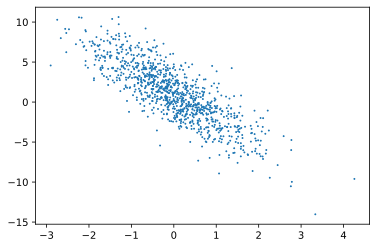

In [6]:
def use_svg_display():
    display.set_matplotlib_formats('svg')
    
def set_figsize(fig_size=(6, 4)):
    use_svg_display()
    plt.rcParams['figure.figsize'] = fig_size

set_figsize()

plt.scatter(features[:,1].numpy(), labels.numpy(), 1)

In [7]:
batch_size = 100

dataset = Data.TensorDataset(features, labels)
data_generator = Data.DataLoader(dataset, batch_size, shuffle=True)

In [8]:
# read data batch
for x, y in data_generator:
    print(x, y)
    break

tensor([[-0.0925, -0.1818],
        [ 0.9411,  0.2569],
        [-0.2444, -0.7740],
        [ 1.3152, -1.4211],
        [ 0.1611, -1.1516],
        [ 1.3065, -1.0391],
        [ 0.2121,  0.0996],
        [-1.3731, -1.4039],
        [-0.6210, -0.1549],
        [-1.2107,  0.8004],
        [ 1.5049, -1.0114],
        [-0.4503, -0.3877],
        [ 0.7279, -0.3208],
        [-0.2839,  0.2019],
        [ 2.0826,  0.9493],
        [-1.7420,  0.1578],
        [-1.3049, -1.5817],
        [ 0.2600,  1.5903],
        [ 0.3767,  0.2825],
        [ 1.8524, -0.3900],
        [ 0.5513,  0.4680],
        [ 0.5794,  0.3674],
        [ 2.7825, -0.2435],
        [ 0.4211,  0.2000],
        [-0.2241, -0.6787],
        [-0.7017,  2.0216],
        [ 0.1446, -0.0720],
        [ 1.0250,  0.9632],
        [ 0.6435, -0.8309],
        [ 1.2376,  1.2912],
        [-0.1215,  0.0402],
        [-0.3276, -0.3277],
        [ 0.4444, -0.4881],
        [-1.4941, -0.7138],
        [-0.4829, -1.0444],
        [-1.5163,  1

## initial model parameter

In [9]:
# initial w and b
w = torch.tensor(np.random.normal(0, 0.01, (num_inputs, 1)), dtype=torch.float32)
b = torch.zeros(1, dtype=torch.float32)

In [10]:
# set requires grad
w.requires_grad_(requires_grad=True)
b.requires_grad_(requires_grad=True)

tensor([0.], requires_grad=True)

## define model

In [11]:
def linear_regression(x, w, b):
    return torch.mm(x, w) + b

## define loss function

In [12]:
def squared_loss(y_pred, y):
    return (y_pred - y.view(y_pred.size()))

## define optimizer

In [13]:
def sgd(params, lr, batch_size):
    for param in params:
        param.data -= lr * param.grad / batch_size

## train model

In [16]:
lr = 0.002
num_epochs = 10
net = linear_regression
loss = squared_loss

for epoch in range(num_epochs):
    for x, y in data_generator:
        l = loss(net(x, w, b), y).sum()  # computer batch loss
        l.backward() # use loss to compute grad
        sgd([w, b], lr, batch_size) # updata parameter
        
        # zero clearn grad
        w.grad.data.zero_()
        b.grad.data.zero_()
        
    epoch_loss = loss(net(features, w, b), labels).mean() # epoch loss
    print('epoch {} => loss {:.4}'.format(epoch+1, epoch_loss))
        

epoch 1 => loss -2.11
epoch 2 => loss -2.13
epoch 3 => loss -2.15
epoch 4 => loss -2.17
epoch 5 => loss -2.19
epoch 6 => loss -2.21
epoch 7 => loss -2.23
epoch 8 => loss -2.25
epoch 9 => loss -2.27
epoch 10 => loss -2.29


In [15]:
print(t_w, '<=>', w.data)
print(t_b, '<=>', b.data)

[2.0, -3.0] <=> tensor([[-0.0128],
        [ 0.0155]])
1.0 <=> tensor([-1.0000])
